In [1]:
import os
os.chdir('/Users/alexrotondo/nlp/')

In [18]:
import numpy as np
import pandas as pd

import string
from stopwords import get_stopwords

from embeddings.bag_of_words.bag_of_words import embed_documents
from embeddings.utils.config import DocumentConfig
from embeddings.utils.distance_functions import euclidean_distance
from embeddings.utils.nearest_neighbors import nearest_neighbors

import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

STANDARD_PUNCTUATION = string.punctuation
STANDARD_STOPWORDS = get_stopwords()

In [3]:
million_songs = pd.read_csv('embeddings/data/spotify_millsongdata.csv')
million_songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
million_songs.text.isna().sum() / million_songs.shape[0]

0.0

In [5]:
song_lyrics = million_songs.text.to_list()

In [6]:
song_lyrics = [sl.replace("\n", "") for sl in song_lyrics]

In [7]:
empty_songs = len(list(filter(lambda x: x == "" or x.isspace(), song_lyrics)))
print(f"proportion of empty songs {empty_songs / len(song_lyrics)}")

proportion of empty songs 0.0


In [24]:
sample = song_lyrics[:1000]

In [25]:
document_config = DocumentConfig.create(
    lower_text=True,
    exclude_punctuation=True,
    remove_stopwords=True,
    excluded_punctuation=STANDARD_PUNCTUATION,
    stopwords=STANDARD_STOPWORDS
)

embeddings = embed_documents(
    document_list=sample,
    document_config=document_config
)

In [26]:
embeddings = np.asanyarray(embeddings)

In [30]:
embeddings.shape

(1000, 9439)

<Axes: >

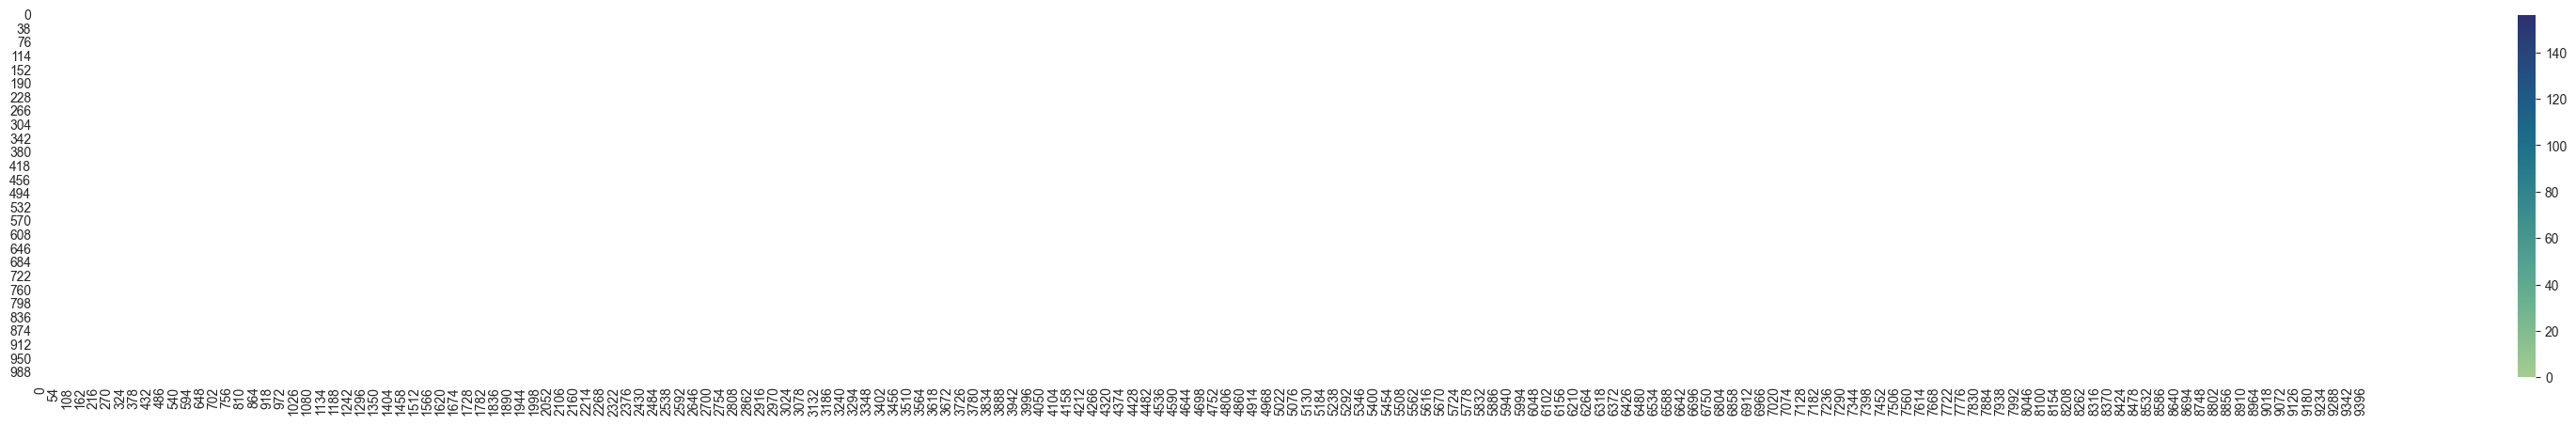

In [28]:
plt.figure(figsize=(40, 5))
sb.heatmap(embeddings, cmap="crest", linewidth=.5)

In [29]:
embeddings[0]

array([0., 1., 2., ..., 0., 0., 1.])

In [ ]:
np.sqrt(np.sum((point1 - point2)**2))